In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load the data
url_normdata = "https://raw.githubusercontent.com/Clintonidahosa/HackBio-projects/refs/heads/main/luad_normalizedData.csv"
gene_expression  = pd.read_csv(url_normdata)

url_metadata = "https://raw.githubusercontent.com/Clintonidahosa/HackBio-projects/refs/heads/main/TCGA_LUAD_metadata.csv"
metadata = pd.read_csv(url_metadata)
print(metadata.columns)
print(gene_expression.columns)


Index(['barcode', 'race', 'tumor_type', 'sample', 'sample_id'], dtype='object')
Index(['TCGA-73-4658-01A-01R-1755-07', 'TCGA-55-8615-01A-11R-2403-07',
       'TCGA-97-8177-01A-11R-2287-07', 'TCGA-67-3771-01A-01R-0946-07',
       'TCGA-49-6744-01A-11R-1858-07', 'TCGA-MP-A4SW-01A-21R-A24X-07',
       'TCGA-97-8176-01A-11R-2403-07', 'TCGA-97-7552-01A-11R-2039-07',
       'TCGA-55-A48Z-01A-12R-A24X-07', 'TCGA-50-5944-01A-11R-1755-07',
       'TCGA-MN-A4N5-01A-11R-A24X-07', 'TCGA-75-5146-01A-01R-1628-07',
       'TCGA-97-7546-01A-11R-2039-07', 'TCGA-55-7911-01A-11R-2170-07',
       'TCGA-44-5643-01A-01R-1628-07', 'TCGA-86-8279-01A-11R-2287-07',
       'TCGA-75-6212-01A-11R-1755-07', 'TCGA-55-8299-01A-11R-2287-07',
       'TCGA-83-5908-01A-21R-2287-07', 'TCGA-44-2655-01A-01R-0946-07',
       'TCGA-44-2661-11A-01R-1758-07', 'TCGA-55-6986-11A-01R-1949-07',
       'TCGA-49-6744-11A-01R-1858-07', 'TCGA-44-6776-11A-01R-1858-07',
       'TCGA-55-6979-11A-01R-1949-07', 'TCGA-44-6146-11A-01R-1858-07

In [ ]:
# 2. Prepare data for ML
# Set the sample_id as the index for metadata
metadata.set_index('barcode', inplace=True)

In [ ]:


# Ensure the sample IDs match between gene expression and metadata
common_samples = gene_expression.columns.intersection(metadata.index)

# Subset both datasets to include only common samples
gene_expression = gene_expression[common_samples]
metadata = metadata.loc[common_samples]



In [ ]:
# 3. Set the classification target
# Using "tumor_type" as the target
X = gene_expression.T # Transpose to have samples as rows and genes as columns
y = metadata['sample'] # Target labels

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [ ]:


# 4. Perform Feature Selection using Recursive Feature Elimination (RFE)
# Define Random Forest as the estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42)



In [7]:
# Perform RFE to select the top 100 features
rfe = RFE(estimator=rf, n_features_to_select=100)
rfe.fit(X_train, y_train)



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=100)

In [8]:
# Select the important features based on RFE
selected_features = X_train.columns[rfe.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [9]:
# 5. Train the Random Forest classifier on the selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)



RandomForestClassifier(random_state=42)

In [10]:
# 6. Make predictions on the test set
y_pred = rf_model.predict(X_test_selected)



In [12]:
# 7. Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest classifier: {accuracy:.2f}")

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy of Random Forest classifier: 1.00

Confusion Matrix:
[[5 0]
 [0 3]]

Classification Report:
                     precision    recall  f1-score   support

      Primary Tumor       1.00      1.00      1.00         5
Solid Tissue Normal       1.00      1.00      1.00         3

           accuracy                           1.00         8
          macro avg       1.00      1.00      1.00         8
       weighted avg       1.00      1.00      1.00         8



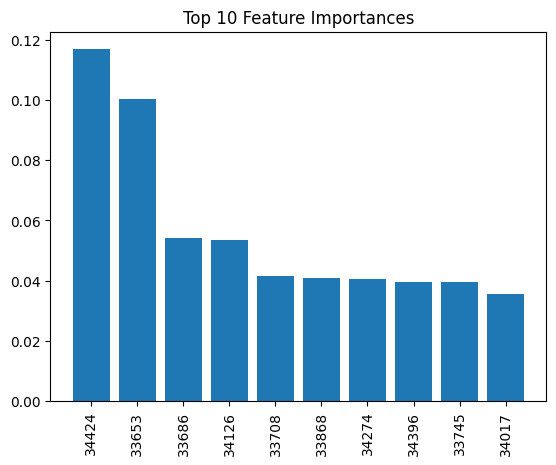

In [13]:
# 8. Save the selected genes to a file
selected_genes = pd.Series(selected_features)
selected_genes.to_csv('selected_genes.csv', index=False)

# 9. Plot the importance of the selected features
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10] # Top 10 features

# Plot top 10 important features
plt.figure()
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices], align="center")
plt.xticks(range(10), [selected_features[i] for i in indices], rotation=90)
plt.show()

In [16]:
 # Create a DataFrame with results
results_df = pd.DataFrame({
    'barcode': X_test_selected.index,  # Barcode or sample name
    'true_sample_type': y_test,  # True sample type from metadata
    'predicted_sample_type': y_pred,  # Predicted sample type
    'model_accuracy': accuracy,  # Overall accuracy of the model
    'selected_features': "; ".join(map(str,selected_features))  # Concatenate selected feature names into a single string
})

# Display the results DataFrame
print(results_df)


                                                   barcode  \
TCGA-44-2655-01A-01R-0946-07  TCGA-44-2655-01A-01R-0946-07   
TCGA-75-6212-01A-11R-1755-07  TCGA-75-6212-01A-11R-1755-07   
TCGA-86-8279-01A-11R-2287-07  TCGA-86-8279-01A-11R-2287-07   
TCGA-50-5939-11A-01R-1628-07  TCGA-50-5939-11A-01R-1628-07   
TCGA-49-6744-01A-11R-1858-07  TCGA-49-6744-01A-11R-1858-07   
TCGA-97-7546-01A-11R-2039-07  TCGA-97-7546-01A-11R-2039-07   
TCGA-44-6148-11A-01R-1858-07  TCGA-44-6148-11A-01R-1858-07   
TCGA-91-6829-11A-01R-1858-07  TCGA-91-6829-11A-01R-1858-07   

                                 true_sample_type predicted_sample_type  \
TCGA-44-2655-01A-01R-0946-07        Primary Tumor         Primary Tumor   
TCGA-75-6212-01A-11R-1755-07        Primary Tumor         Primary Tumor   
TCGA-86-8279-01A-11R-2287-07        Primary Tumor         Primary Tumor   
TCGA-50-5939-11A-01R-1628-07  Solid Tissue Normal   Solid Tissue Normal   
TCGA-49-6744-01A-11R-1858-07        Primary Tumor         Primary 